<h1 align='center'> 파이썬과학프로그래밍기초 실습 9</h1>

<p style="text-align: right"> 2021.11.29.</p>

### 
<div class="alert alert-block alert-info">
- 파일 이름에서 00000000을 자신의 학번으로, name을 자신의 이름으로 수정하세요.

- 다음 줄에 자신의 이름, 학번, 학과(전공)을 적으세요.

* 이름:   김대성&nbsp;&nbsp;          학번:    20185212&nbsp;&nbsp;         학과(전공): 스마트IoT
    
</div>

- Jupyter notebook에 대한 설명은 [The Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/)을  참고하라

- Markdown은 [Markdown Guide](https://www.markdownguide.org/)를 참고하라.
- [Markdown Cheat Sheet](https://www.markdownguide.org/cheat-sheet/)

* 과제 제출: 12월 3일 (금) 오후 6:00까지 최종본 제출. 


#### 문제 0: 아래 셀에 다음 명령을 실행하라.

```
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from PIL import Image
```


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import misc
from PIL import Image

#### 예제 1. 이미지 저장 후 다시 화면에 표시하기

```
Image.fromarray(ndarray).save(filename)
img = np.array(Image.open(filename))
```

아래 프로그램으로 만들어진 ndarray img를 영상 파일로 저장한 후에, 다시 읽어서 화면에 표시하라.

In [2]:
rows = 201
cols = 201
center = [100, 100]
radius = 60
img = np.zeros((rows, cols, 3), dtype=np.uint8)
r = np.arange(rows).reshape(cols,1)
c = np.arange(cols)
img[(r-center[0])**2+(c-center[1])**2 <= radius**2] = np.array([0, 255, 255])

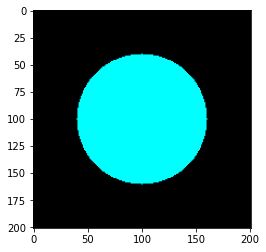

In [3]:
plt.imshow(img)
plt.show()

In [8]:
img1 = Image.fromarray(img)
type(img1)

PIL.Image.Image

In [12]:
img1.save('cyan_circle.png')

In [13]:
img2 = Image.open('cyan_circle.png')
type(img2)

PIL.PngImagePlugin.PngImageFile

In [14]:
img2 = np.array(img2)
type(img2)

numpy.ndarray

#### 예제 2. NumPy ndarray를 이용하여 다음 영상을 만들어서 화면에 표시하라.

<img src='bw_check_pattern.png' width="35%"/>

In [54]:
img = np.zeros((10, 10), dtype = np.int8)

In [55]:
for c in range(10):
    for r in range(10):
        if((r+c)%2):
            img[r,c] = 255

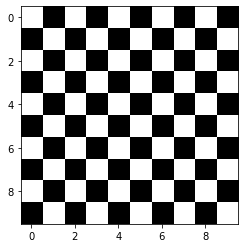

In [56]:
plt.imshow(img, cmap='gray')

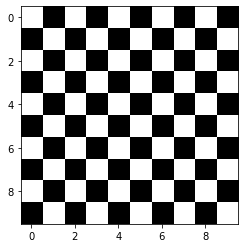

In [53]:
img = np.zeros((10, 10), dtype = np.int8)
img[::2, 1::2] = 255
img[1::2, 0::2] = 255
plt.imshow(img, cmap='gray')

#### 예제 4. NumPy ndarray를 이용하여 다음 영상을 만들어서 화면에 표시하라.

<img src='color_check_pattern.png' width="40%"/>

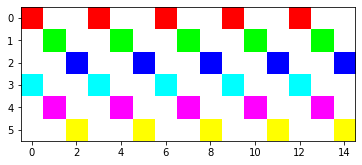

In [87]:
img = np.ones((6,15,3), dtype = np.uint8) * 255
img[0, ::3, [1,2]] = 0
img[1, 1::3, [0,2]] = 0
img[2, 2::3, [1,0]] = 0
img[3, ::3, 0] = 0
img[4, 1::3, 1] = 0
img[5, 2::3, 2] = 0
plt.imshow(img)

#### 예제 4. scipy.misc.face() 영상으로부터 다음 세 영상을 만들어서 각각 화면에 출력하라.

<img src="face2.png" width="60%"/>

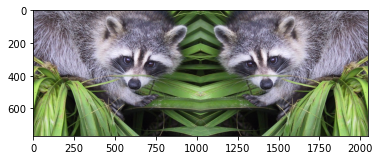

In [91]:
face = misc.face()
face_h = np.hstack((face, face[:, ::-1, :]))
plt.imshow(face_h)

<img src="face3.png" width="30%"/>

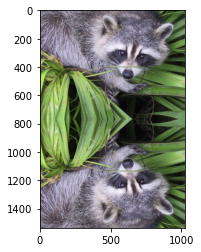

In [92]:
face_v = np.vstack((face, face[::-1, :, :]))
plt.imshow(face_v)

<img src="face4.png" width="60%"/>

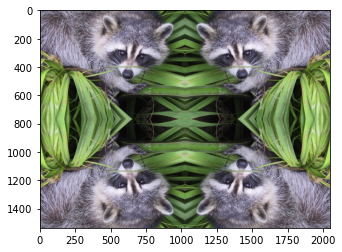

In [94]:
face_hv = np.vstack((face_h, face_h[::-1, :, :]))
plt.imshow(face_hv)

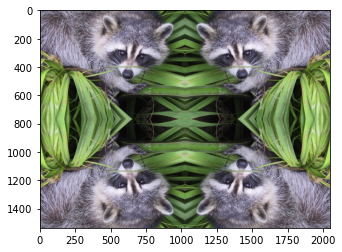

In [95]:
face_hv = np.hstack((face_v, face_v[:, ::-1, :]))
plt.imshow(face_hv)

#### 예제 5. Histogram 구하기

##### 5.1) 아래 셀에 있는 shape이 (5,5)인 배열로 표현되는 영상 s_img의 각 숫자의 개수를 프로그램을 사용하지 말고 손으로 직접 계산하라.


In [96]:
np.random.seed(153)

s_img = np.random.randint(1, 5, (5,5)) # 5X5 matrix 1~5 random
s_img

array([[4, 1, 1, 1, 4],
       [2, 2, 4, 3, 2],
       [3, 4, 3, 2, 3],
       [1, 3, 1, 3, 3],
       [3, 2, 3, 1, 1]])

**답**

- 1: 7
- 2: 5
- 3: 9
- 4: 4

##### 5.2) 예제 5.1)에서 구한 데이터를 이용해서 다음 히스토그램의 그래프를 그리는 Python 프로그램을 작성하라.



<img src="histogram-4x4.png" width="40%"/>


In [97]:
h = np.array([7, 5, 9, 4])
x = np.array([1,2,3,4])

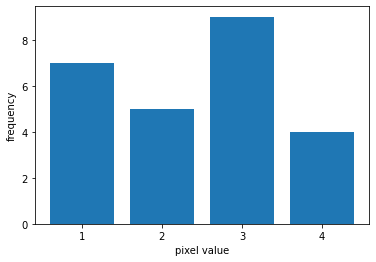

In [102]:
plt.bar(x, h)
plt.xticks(x)
plt.xlabel("pixel value")
plt.ylabel("frequency")
plt.show()

##### 5.3) s_img 배열의 히스토그램을 구하는 Python 프로그램을 작성하라.

In [112]:
s_img.min(), s_img.max()
x = np.arange(s_img.min(), s_img.max()+1)
h = np.zeros_like(x) # x.shape과 같은 값으로 배열생성

for p in x:
    print(s_img[s_img == p])
    print(len(s_img[s_img == p]))

[1 1 1 1 1 1 1]
7
[2 2 2 2 2]
5
[3 3 3 3 3 3 3 3 3]
9
[4 4 4 4]
4


In [113]:
for p in x:
    h[p-s_img.min()] = len(s_img[s_img == p]) # np.sum(s_img == p)
h

array([7, 5, 9, 4])

####  예제 6.

현재 디렉토리에 있는 "nature-3082832_640.jpg" 파일을 읽어서 화면에 표시하라.

<img src="nature-3082832_640.jpg" width="40%"/>

In [46]:
file_name = "nature-3082832_640.jpg"
img = np.array(Image.open(file_name))
print(img.shape)

(359, 640, 3)


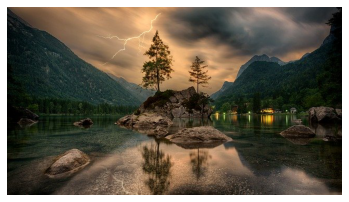

In [47]:
plt.imshow(img)
plt.axis('off')
plt.show()

####  예제 7.

"nature-3082832_640.jpg" 이미지를 흑백 이미지로 변환하여 화면에 표시하라.

In [48]:
# RGB의 평균
img[0,0,:], img[0,0,:].mean().astype(np.uint8)

(array([79, 70, 63], dtype=uint8), 70)

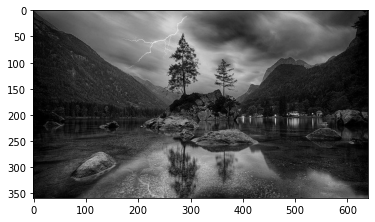

In [49]:
img_gray = img.mean(axis = 2).astype(np.uint8)
plt.imshow(img_gray, cmap='gray')

####  예제 8.

"nature-3082832_640.jpg" 이미지의 흑백 이미지의 히스토그램을 그려라.

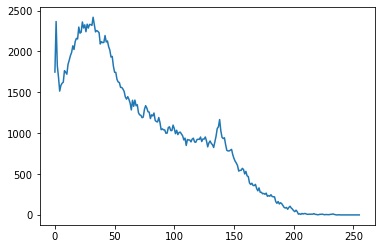

In [70]:
x = np.arange(256)

img_hist = [np.sum(img_gray == n) for n in x]
plt.plot(img_hist)

####  예제 9

"nature-3082832_640.jpg" 이미지의 흑백 이미지의 모든 픽셀에 50을 더한 이미지를 만들어라.
이때 어떤 문제가 발생하는지 설명하고 이 해결 방법을 설명하라.

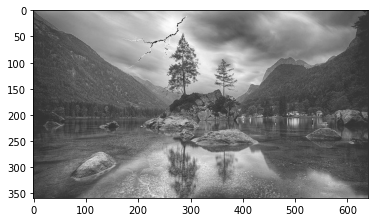

In [135]:
plt.imshow(img_gray+50, cmap='gray')

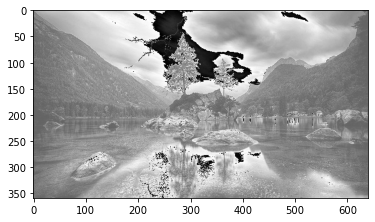

In [136]:
plt.imshow(img_gray+100, cmap='gray')

**설명**: 픽셀의 값의 범위가 0~255인데 맥시멈값 255은 305로 오버플로우 발생 
가장밝은 부분 : 255 -> 오버플로우 발생으로 어두워짐(번개부분)
해결방법 : 255가 넘어간 부분들은 255으로 값을 고정시켜줌
오버플로우가 발생하기 전에 255로 조정

####  예제 10.

"nature-3082832_640.jpg" 이미지의 흑백 이미지를 $f(x,y)$라고 할 때, 다음 변환을 통해서 새로운 이미지 $g(x,y)$를 만들어 원 영상과 변환된 영상 두 개를 화면에 표시해서 비교해 보라.

$$g(x,y) = \begin{cases}
0, & f(x,y) < 20 \\
255/186(f(x,y) - 20), & 20 \le f(x, y) \le 206 \\
255, &f(x, y) > 206
\end{cases}
$$

두 개의 문턱값 20과 206을 변경해 가면서 변환된 영상의 화질을 비교해 보라

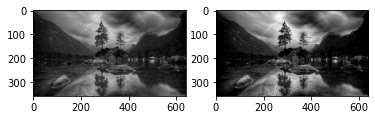

In [6]:
file_name = "nature-3082832_640.jpg"
img = np.array(Image.open(file_name))
img = np.asarray(img)
img_gray = img.mean(axis=2).astype(np.uint8)

lower = 20
upper = 206

img_gray_2 = img_gray.copy()
img_gray_2[img_gray_2 > upper] = 255
img_gray_2[img_gray_2 < lower] = 0

img_gray_2[(img_gray_2>=lower) & (img_gray_2<=upper)] = \
(255/(upper-lower)*(img_gray_2[(img_gray_2>=lower) \
            & (img_gray_2<=upper)]-lower)).astype(np.uint8)

plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.subplot(122)
plt.imshow(img_gray_2, cmap='gray')

####  예제 11. Histogram equaliztion

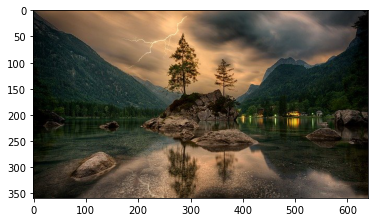

In [51]:
    plt.imshow(img)

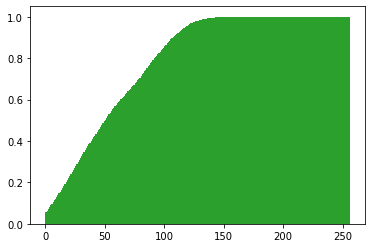

In [55]:
new_img = np.zeros_like(img)
for ch, one_d_image in enumerate(img.reshape(-1,3).transpose()):
    cdf, bins, patches = plt.hist(one_d_image, bins=256, range=(0,256), density=True, cumulative=True)
    new_pixels = np.interp(one_d_image, bins[:-1], cdf*255) #pixels -> one_d_image로 변경
    new_pixels = new_pixels.astype(np.uint8)
    new_img[:,:,ch] = new_pixels.reshape(img.shape[0], img.shape[1])

In [57]:
print(one_d_image)

[63 65 50 ... 57 57 58]


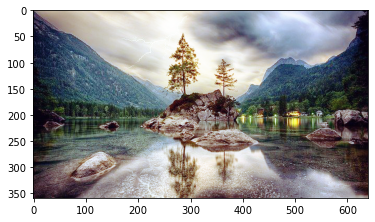

In [56]:
plt.imshow(new_img)

####  예제 12. gradient mask

In [10]:
c = (img.shape[0]//2, img.shape[1]//2)


In [11]:
a, b, c = img.shape

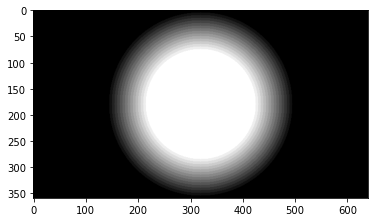

In [12]:
h, w, ch = img.shape
c = (h//2, w//2)
r0 = 100
mask = np.ones(img.shape[:2], dtype=float)
X, Y = np.ogrid[:h, :w]
for r in range(r0, h//2, 5):
#    mask[(X-c[0])**2 + (Y-c[1])**2 > r**2] = 1 - (r-r0) / (h//2-r0)
    mask[(X-c[0])**2 + (Y-c[1])**2 > r**2] = 1 - (r-r0) / (h//2)
plt.imshow(mask, cmap='gray')
plt.show()

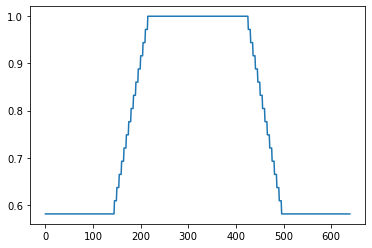

In [13]:
plt.plot(mask[h//2])

In [14]:
mask = mask.reshape(*(mask.shape), -1)
mask.shape, img.shape

((359, 640, 1), (359, 640, 3))

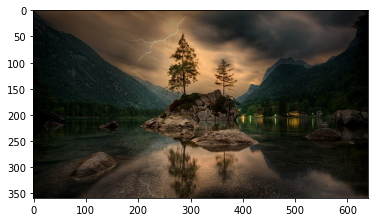

In [15]:
masked_img = (img * mask).astype(np.uint8)
plt.imshow(masked_img)
plt.show()

####  문제 1.

"nature-3082832_640.jpg" 이미지의 컬러별 히스토그램의 그래프를 그려라.

다음과 같은 그림이 나와야 한다.

![histogram_of_each_color](histogram_of_each_color.png "histogram of each color channel")

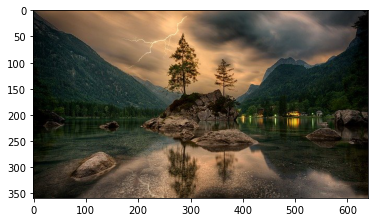

In [64]:
plt.imshow(img)

In [67]:
np.shape(img)

(359, 640, 3)

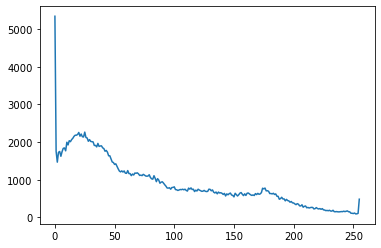

In [73]:
x = np.arange(256)

img_hist_red = [np.sum(img[:,:,0] == n) for n in x]
plt.plot(img_hist_red)

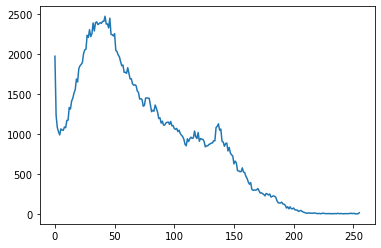

In [75]:
img_hist_green = [np.sum(img[:,:,1] == n) for n in x]
plt.plot(img_hist_green)

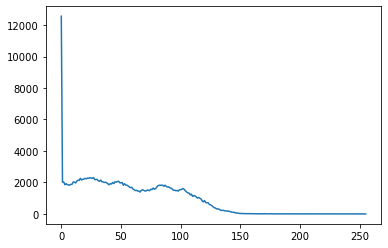

In [76]:
img_hist_blue = [np.sum(img[:,:,2] == n) for n in x]
plt.plot(img_hist_blue)

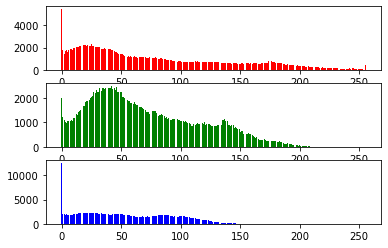

In [161]:
plt.subplot(311)
plt.bar(x, img_hist_red, color='red')
plt.subplot(312)
plt.bar(x, img_hist_green, color='green')
plt.subplot(313)
plt.bar(x, img_hist_blue, color='blue')
plt.rcParams["figure.figsize"] = (6,4)
plt.show()

#### 문제 2.

다음 영상을 화면에 표시하라.

![face_pasted](face_pasted.png "Face image with a small image")

단, 오른쪽에 영상에서 큰 영상은 원영상의 모든 픽셀값을 반으로 줄인 것이고, 작은 영상은 원영상의 크기를 가로, 세로 각각 1/4로 줄인 것이다.

참고: face 영상을 읽으면, 이 영상의 flags의 WRITABLE 속성이 False로 설정되어 있어서 수정이 불가능하다. 
따라서 읽은 영상을 수정할 수 없기 때문에 복사본을 만들어서 처리해야 한다.

In [162]:
img = misc.face()
img.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : False
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

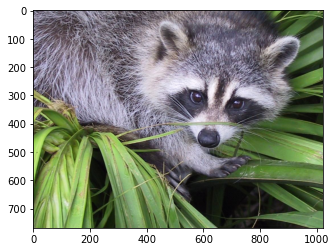

In [168]:
face = misc.face()
plt.imshow(face)

In [169]:
np.shape(face)

(768, 1024, 3)

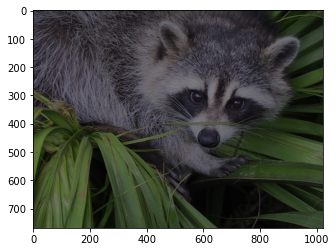

In [171]:
face2 = face//2
plt.imshow(face2)

(192, 256, 3)


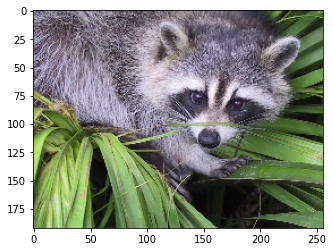

In [178]:
face3 = face.copy()[::4, ::4, :]
print(np.shape(face3))
plt.imshow(face3)

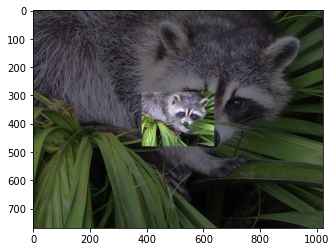

In [196]:
face4 = face2.copy()
face4[288:288+192, 384:384+256, :] = face3
plt.imshow(face4)

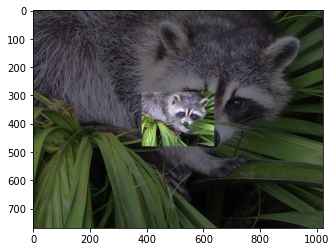

In [198]:
face4 = face2.copy()
a = np.shape(face2)[0]//2 - np.shape(face3)[0]//2 # 두 그림을 원점에 곂쳤을 때 열의 갯수 차
b = np.shape(face2)[1]//2 - np.shape(face3)[1]//2 # 행의 갯수 차
face4[a:a+np.shape(face3)[0], b:b+np.shape(face3)[1], :] = face3
plt.imshow(face4)